In [1]:
# There is currently an incompatibility in the code completion (https://stackoverflow.com/a/65862512/227081) that can be circumvented by disabling the jedi code completion
%config Completer.use_jedi = False

In [3]:
import pathlib
import PIL
import PIL.Image
import tensorflow as tf
import numpy as np

2023-10-27 20:15:37.310846: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 20:15:37.310912: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 20:15:37.310928: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 20:15:37.315447: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model_location = '/project/saved_models/first_model.keras'
data_dir=pathlib.Path('/project/training_data')

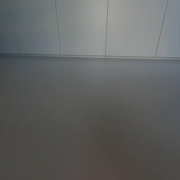

In [8]:
danger = list(data_dir.glob('danger/*.png'))
safe = list(data_dir.glob('safe/*.png'))
image = PIL.Image.open(str(safe[0])).resize((180,180))
image

In [9]:
model = tf.keras.models.load_model(model_location)

2023-10-27 20:17:02.713098: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 20:17:02.716221: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 20:17:02.716262: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 20:17:02.718712: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 20:17:02.718743: I tensorflow/compile

In [12]:
pred = model.predict(tf.expand_dims(tf.constant(image), axis=0))
pred

1/1 [==============================] - 0s 16ms/step


array([[-3.1622748,  2.7224512]], dtype=float32)

In [13]:
np.argmax(pred)

1

In [25]:
labels = sorted([d.name for d in data_dir.iterdir() if d.is_dir()])
labels

['danger', 'safe']

In [26]:
pred_label = labels[np.argmax(pred)]
pred_label

'safe'